<img src="img/Auswahl_2016-05-16_001.png"/>

### Groupname: Gruppe 5

<table align="left" style="border-style: hidden; border-collapse: collapse">
  <tr>
    <td>Arne Siebenmorgen</td>
    <td>330529</td>
  </tr>
  <tr>
    <td>Holger Prang </td>
    <td>WM</td>
  </tr>
  <tr>
    <td>Eugene Reese</td>
    <td>319776</td>
  </tr>
  <tr>
    <td>Jens Meiners</td>
    <td>332697</td>
  </tr>
</table>

In [15]:
%matplotlib inline  
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def pca(data, axis=0, center=True, normalize=False):
    mu = data.mean(axis=axis)
    if center:
        data = data - mu
    if normalize:
        data = (data - mu)/data.std(axis=axis)
    eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
    return eigenvectors, eigenvalues

def project(data, eigenvectors, axis=0):
    projected_data = np.dot(data, eigenvectors)
    sigma = projected_data.std(axis=axis).mean()
    return projected_data, sigma

<img src="img/Auswahl_2016-05-16_002.png"/>

<img src="img/Auswahl_2016-05-16_003.png"/>

<img src="img/Auswahl_2016-05-16_004.png"/>

<img src="img/Auswahl_2016-05-16_005.png"/>

<img src="img/Auswahl_2016-05-16_006.png"/>

<img src="img/Auswahl_2016-05-16_007.png"/>

<img src="img/Auswahl_2016-05-16_008.png"/>

<img src="img/Auswahl_2016-05-16_009.png"/>

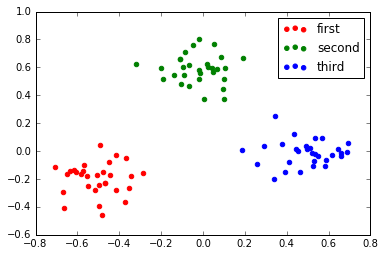

In [106]:
# prepare
sd = 0.1
data = np.random.normal(0.0, sd, (90, 2))
data[:30] = data[:30] + np.array([-0.5, -0.2])
data[30:60] = data[30:60] + np.array([0, 0.6])
data[60:] = data[60:] + np.array([0.5, 0])

# plot to check correctness
plt.scatter(data[:30,0], data[:30,1], color='r', label='first')
plt.scatter(data[30:60,0], data[30:60,1], color='g', label='second')
plt.scatter(data[60:,0], data[60:,1], color='b', label='third')
plt.legend()
plt.show()

<img src="img/Auswahl_2016-05-16_010.png"/>

In [119]:
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh

<img src="img/Auswahl_2016-05-16_013.png"/>

In [120]:
def rbf(x, sigma):
    dists = squareform(pdist(x, 'euclidean'))
    return np.exp(- np.power(dists, 2) / (2* sigma**2))

<img src="img/Auswahl_2016-05-16_012.png"/>

In [121]:
def center_kernelmatrix(x):
    N = x.shape[0]
    one_n = np.ones((N,N)) / N
    x = x - one_n.dot(x) - x.dot(one_n) + one_n.dot(x).dot(one_n)

In [122]:
def kernel_pca(data, center=True):
    if center:
        center_kernelmatrix(data)
    eigenvalues, eigenvectors = eigh(data)
    return eigenvectors[:,::-1], eigenvalues[::-1]

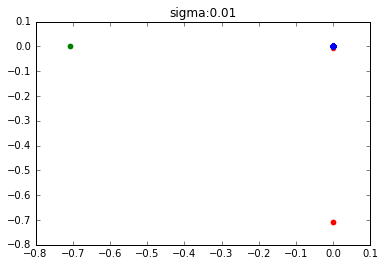

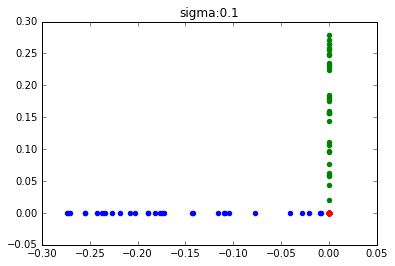

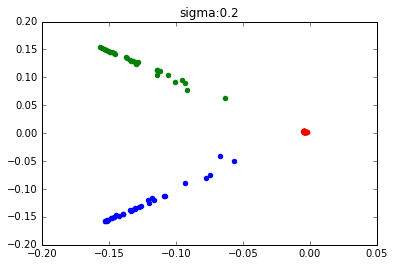

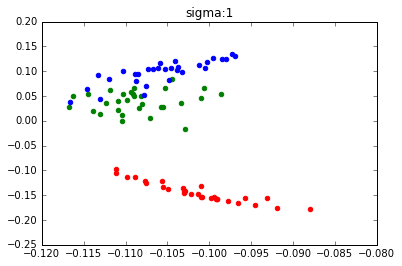

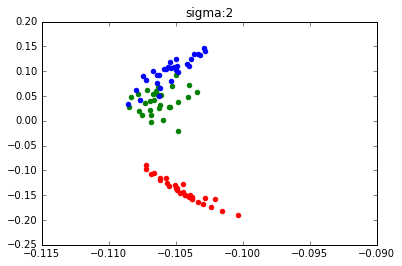

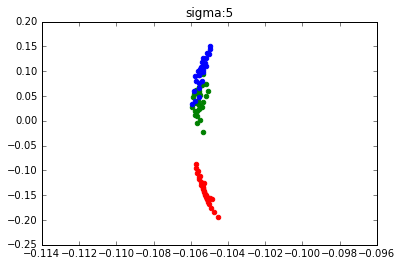

In [118]:
sigmas = [0.01, 0.1, 0.2, 1, 2, 5]
for sigma in sigmas:
    rbf_vecs, rbf_vals = kernel_pca(rbf(data, sigma))
    plt.scatter(rbf_vecs[:30,0], rbf_vecs[:30,1], color='r')
    plt.scatter(rbf_vecs[30:60,0], rbf_vecs[30:60,1], color='g')
    plt.scatter(rbf_vecs[60:,0], rbf_vecs[60:,1], color='b')
    plt.title('sigma:'+str(sigma))
    plt.show()

The datapoints are easiely separable using $\sigma = 0.2$ and projecting onto the second PC. There may be other $\sigma$ for separation via PC one, but this result seems to be reasonable good.

<img src="img/Auswahl_2016-05-16_011.png"/>

In [126]:
def project_kernel(pt, data, sigma, vecs, vals):
    dists = np.array([np.sum((pt-row)**2) for row in data])
    kern = np.exp(- np.power(dists, 2) / (2* sigma**2))
    return kern.dot(vecs / vals)

In [134]:
sigma = 0.2
rbf_vecs, rbf_vals = kernel_pca(rbf(data, sigma))
result = None
for i in np.arange(-1,1,0.1):
    for j in np.arange(-1,1,0.1):
        pt = np.array([i,j])
        proj = project_kernel(pt, data, sigma, rbf_vecs[:,:8], rbf_vals[:8])
        if result is None:
            result = proj
        else:
            result = np.vstack((result, proj))

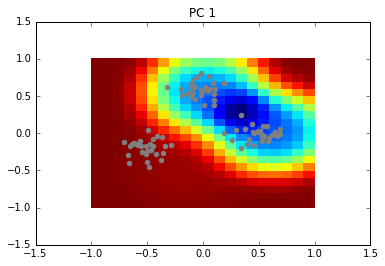

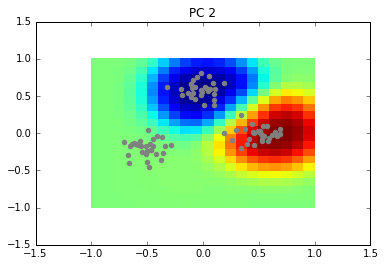

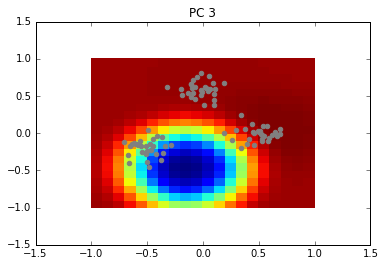

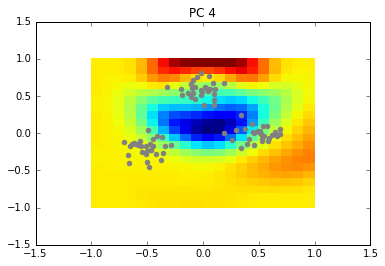

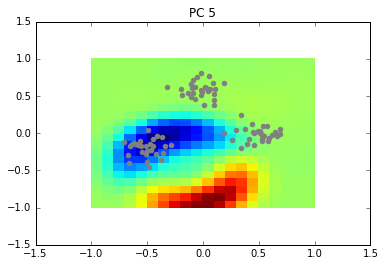

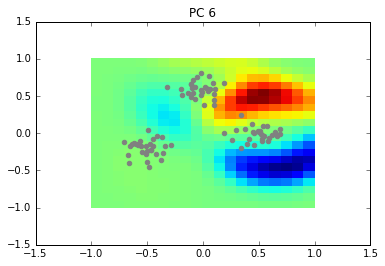

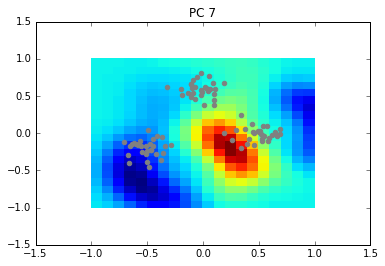

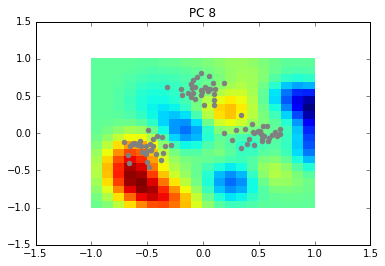

In [158]:
reresult = np.reshape(result, (20,20,8))
y, x = np.mgrid[slice(-1, 1.1, 0.1),
                slice(-1, 1.1, 0.1)]
for i in range(8):
    plt.pcolor(x, y, reresult[:,:,i])
    plt.scatter(data[:,0], data[:,1], color='gray')
    plt.title('PC '+str(i+1))
    plt.show()

Desc:  
We plotted 8 plots, one for every PC. This greatly improved readability for us and therefor better interpretations. We are excited to see the results of other groups for this plot!

Interpretation:  
Using the pseudo color plot, we can nicely see the radial basis for every PC. The result alignes nicely with the previous plots where we saw that we can map onto the second PC best. Here, the projection of all test points onto the second PC also makes clear, that two radial basis align with two the clusters of out sample data points. the third cluster does not have a basis on its own, but we could have guessed that from the previous plots with lower $\sigma$ values. To classify the different clusters, a projection of new test points would hopefully yield high and low projection values for the two clusters (or classes) backend by the radial bases, and intermediate values for the third cluster. Sadly, there may be intermediate values in between the two radial basis that could be classified as the third cluster. Also, any outlier will most probably be classified as cluster three. This is a negative aspect of the radial basis kernels, but we think we reached a reasonably good result never the less.